# Roasted Coffee Beans Classification Model with Mobilenetv2

Model ini digunakan untuk melakukan klasifikasi biji coffee berdasarkan level roasting-nya. Dataset yang digunakan berasal dari Kaggle.com yang terdiri dari 4 class, yaitu Green, Light, Medium, dan Dark. 

Dataset yang digunakan berjumlah 1600. Dengan distribusi sebagai berikut:  
* 1200 gambar untuk data train (75%)
* 400  gambar untuk data test  (25%)

[Link Dataset - Coffee Bean Dataset](https://www.kaggle.com/datasets/gpiosenka/coffee-bean-dataset-resized-224-x-224)

## Importing the necessary libraries


In [ ]:
import os
import keras
import numpy as np
import pandas as pd
import tensorflow as tf
import time, copy, argparse
import multiprocessing
import matplotlib.pyplot as plt

from PIL import Image
from tensorflow import keras
from tensorflow.keras import datasets, layers, models, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf
from keras.preprocessing import image
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import warnings
warnings.filterwarnings( "ignore", module = "matplotlib\..*" )

## Load Saved Model


In [ ]:
from pathlib import Path

load_model_dir = "/content/drive/My Drive/coffee_bean_roasting_level/load_models/"

#python program to check if a path exists
#if it doesn’t exist we create one
import os
if not os.path.exists(load_model_dir):
   os.makedirs(load_model_dir)

In [ ]:
#RUN CELL INI HANYA JIKA INGIN LOAD MODEL YANG SUDAH DILATIH DAN DISIMPAN DI FOLDER model_kualitas (SESUAIKAN PATH) 
#SEHINGGA BISA LANGSUNG DIUJI DI CELL PREDIKSI TANPA MENGULANG PROSES TRAINING

from tensorflow.keras.models import load_model
MobileNetV2 = '/content/drive/My Drive/coffee_bean_roasting_level/load_models/mobilenetv2.h5'
model2 = load_model(MobileNetV2)

## Mount to Google Drive

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pwd

/content


In [ ]:
%cd /content/drive/My Drive/coffee_bean_roasting_level/dataset/
!ls

/content/drive/My Drive/coffee_bean_roasting_level/dataset
test  train


## Train, Validation, and Testing Variabel

In [ ]:
data_dir = '/content/drive/My Drive/coffee_bean_roasting_level/dataset/'
train_dir = os.path.join(data_dir, "train")
test_dir = os.path.join(data_dir, "test")

print("Folders in Train dir:\t", os.listdir(train_dir))
print("Folders in Test dir :\t", os.listdir(test_dir))

Folders in Train dir:	 ['Dark', 'Light', 'Medium', 'Green']
Folders in Test dir :	 ['Light', 'Dark', 'Medium', 'Green']


## Data Preprocessing and Exploratory Data Analytics

In [ ]:
green_coffe_bean_train_dir = os.path.join(train_dir, "Green")
light_coffe_bean_train_dir = os.path.join(train_dir, "Light")
medium_coffe_bean_train_dir = os.path.join(train_dir, "Medium")
dark_coffe_bean_train_dir = os.path.join(train_dir, "Dark")

print("The number of Green Coffee Beans in the data train \t:", len(os.listdir(green_coffe_bean_train_dir)))
print("The number of Light Coffee Beans in the data train \t:", len(os.listdir(light_coffe_bean_train_dir)))
print("The number of Medium Coffee Beans in the data train \t:", len(os.listdir(medium_coffe_bean_train_dir)))
print("The number of Dark Coffee Beans in the data train \t:", len(os.listdir(dark_coffe_bean_train_dir)))

green_coffe_bean_test_dir = os.path.join(test_dir, "Green")
light_coffe_bean_test_dir = os.path.join(test_dir, "Light")
medium_coffe_bean_test_dir = os.path.join(test_dir, "Medium")
dark_coffe_bean_test_dir = os.path.join(test_dir, "Dark")

print("\nThe number of Green Coffee Beans in the data test \t:", len(os.listdir(green_coffe_bean_test_dir)))
print("The number of Light Coffee Beans in the data test \t:", len(os.listdir(light_coffe_bean_test_dir)))
print("The number of Medium Coffee Beans in the data test \t:", len(os.listdir(medium_coffe_bean_test_dir)))
print("The number of Dark Coffee Beans in the data test \t:", len(os.listdir(dark_coffe_bean_test_dir)))

The number of Green Coffee Beans in the data train 	: 300
The number of Light Coffee Beans in the data train 	: 300
The number of Medium Coffee Beans in the data train 	: 300
The number of Dark Coffee Beans in the data train 	: 300

The number of Green Coffee Beans in the data test 	: 100
The number of Light Coffee Beans in the data test 	: 100
The number of Medium Coffee Beans in the data test 	: 100
The number of Dark Coffee Beans in the data test 	: 100


In [ ]:
file_coffee_bean_green = os.listdir(green_coffe_bean_train_dir)
print(file_coffee_bean_green[:10])
file_coffee_bean_light = os.listdir(light_coffe_bean_train_dir)
print(file_coffee_bean_light[:10])
file_coffee_bean_medium = os.listdir(medium_coffe_bean_train_dir)
print(file_coffee_bean_medium[:10])
file_coffee_bean_dark = os.listdir(dark_coffe_bean_train_dir)
print(file_coffee_bean_dark[:10])

['green (197).png', 'green (22).png', 'green (265).png', 'green (131).png', 'green (172).png', 'green (108).png', 'green (116).png', 'green (279).png', 'green (118).png', 'green (219).png']
['light (21).png', 'light (169).png', 'light (147).png', 'light (135).png', 'light (202).png', 'light (175).png', 'light (2).png', 'light (184).png', 'light (181).png', 'light (13).png']
['medium (147).png', 'medium (156).png', 'medium (140).png', 'medium (109).png', 'medium (1).png', 'medium (150).png', 'medium (124).png', 'medium (133).png', 'medium (129).png', 'medium (119).png']
['dark (102).png', 'dark (1).png', 'dark (101).png', 'dark (110).png', 'dark (103).png', 'dark (105).png', 'dark (100).png', 'dark (111).png', 'dark (11).png', 'dark (10).png']


In [ ]:
green_coffee_bean_imgs = os.listdir(green_coffe_bean_train_dir)
light_coffee_bean_imgs = os.listdir(light_coffe_bean_train_dir)
medium_coffee_bean_imgs = os.listdir(medium_coffe_bean_train_dir)
dark_coffee_bean_imgs = os.listdir(dark_coffe_bean_train_dir)

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255.,
    rotation_range=20,
    width_shift_range=0.2,  
    height_shift_range=0.2,  
    shear_range=0.2, 
    zoom_range=0.2,  
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest' 
    )

validation_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        batch_size = 32,
        target_size = (224,224),
        class_mode = 'categorical',
        color_mode = 'rgb',
)

validation_generator = validation_datagen.flow_from_directory(
        test_dir,
        batch_size = 32,
        target_size = (224,224),
        class_mode = 'categorical',
        color_mode = 'rgb',
)

Found 1200 images belonging to 4 classes.
Found 400 images belonging to 4 classes.


In [ ]:
class_labels = list(train_generator.class_indices.keys())
print("Class Labels: ", class_labels)

labels = []
for label in train_generator.class_indices:
  labels.append(label)
num_labels = len(labels)

print("Labels \t: {}".format(labels))
print("Num labels: {}".format(num_labels))

Class Labels:  ['Dark', 'Green', 'Light', 'Medium']
Labels 	: ['Dark', 'Green', 'Light', 'Medium']
Num labels: 4


In [ ]:
class_indices = train_generator.class_indices

# Show Index every class
for class_name, class_index in class_indices.items():
    print(f"Class: {class_name}, Indexs: {class_index}")

Class: Dark, Indexs: 0
Class: Green, Indexs: 1
Class: Light, Indexs: 2
Class: Medium, Indexs: 3


## Data visualization

In [ ]:
# Method for data visualization sample
def data_visualization_sample(type_bean_imgs, type_bean_dir ): 
  plt.figure(figsize=(17, 5))
  for i, img_path in enumerate(type_bean_imgs[:6]):
    sp = plt.subplot(1, 6, i+1)
    img = mpimg.imread(os.path.join(type_bean_dir, img_path))
    plt.imshow(img)
  return plt.show(block=None)


 Sample Green Coffee Bean images:



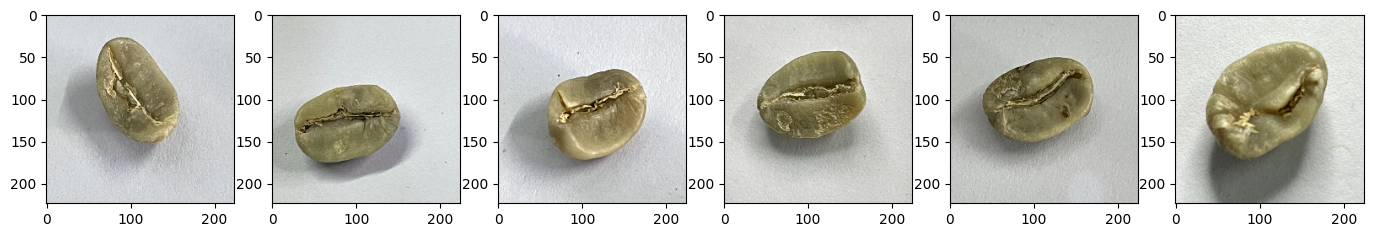

In [ ]:
print('\n Sample Green Coffee Bean images:\n')
data_visualization_sample(green_coffee_bean_imgs,green_coffe_bean_train_dir)


 Sample Light Coffee Bean images:



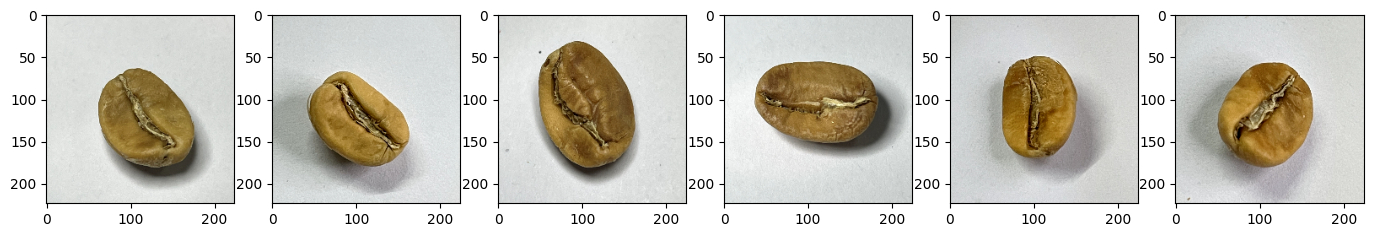

In [ ]:
print('\n Sample Light Coffee Bean images:\n')
data_visualization_sample(light_coffee_bean_imgs,light_coffe_bean_train_dir)


 Sample Medium Coffee Bean images:



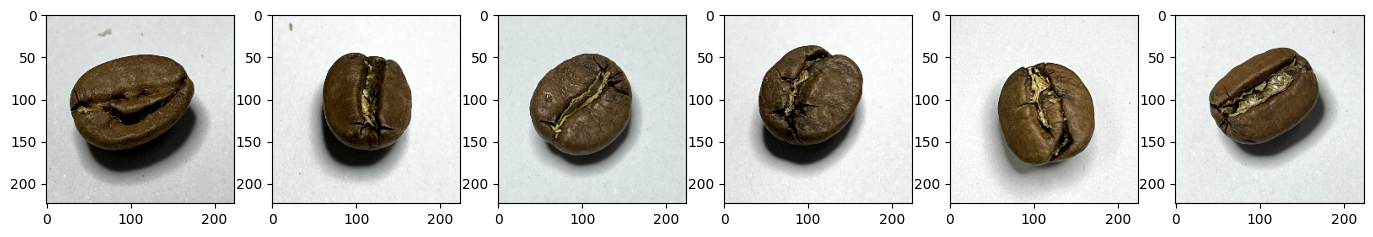

In [ ]:
print('\n Sample Medium Coffee Bean images:\n')
data_visualization_sample(medium_coffee_bean_imgs,medium_coffe_bean_train_dir)


 Sample Dark Coffee Bean images:



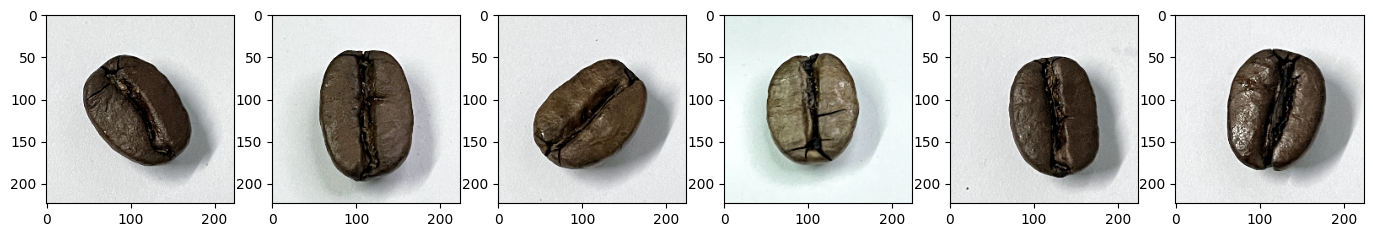

In [ ]:
print('\n Sample Dark Coffee Bean images:\n')
data_visualization_sample(dark_coffee_bean_imgs,dark_coffe_bean_train_dir)

## Callbacks

In [ ]:
# define my callbacks include (EarlyStopping, ModelCheckpoint)
def my_callbacks(filename):
  # earlyStopping = EarlyStopping(monitor='val_loss', mode='auto', verbose=1, patience=5)
  # modelCheckpoint = ModelCheckpoint(filename, monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

  # return [modelCheckpoint]

## MODEL 1 : Convolutional Neural Network 

In [ ]:
model1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), strides = (2,2), activation='relu', input_shape=(224,224,3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(32, (3,3), strides = (2,2), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), strides = (2,2), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')  
])

model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 111, 111, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 55, 55, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 27, 27, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 6, 6, 64)          18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 3, 3, 64)        

In [ ]:
model1.compile(optimizer = tf.optimizers.Adam(learning_rate=0.001),
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

In [ ]:
history1 = model1.fit(train_generator,
                      epochs = 20,
                      validation_data = validation_generator,
                      verbose = 1,
                      )

Epoch 1/20
38/38 [==============================] - 464s 12s/step - loss: 1.3725 - accuracy: 0.3242 - val_loss: 1.2337 - val_accuracy: 0.3225
Epoch 2/20
38/38 [==============================] - 34s 884ms/step - loss: 0.6127 - accuracy: 0.7750 - val_loss: 0.1297 - val_accuracy: 0.9675
Epoch 3/20
38/38 [==============================] - 31s 804ms/step - loss: 0.2391 - accuracy: 0.9192 - val_loss: 0.1709 - val_accuracy: 0.9425
Epoch 4/20
38/38 [==============================] - 30s 801ms/step - loss: 0.1545 - accuracy: 0.9500 - val_loss: 0.1054 - val_accuracy: 0.9700
Epoch 5/20
38/38 [==============================] - 34s 887ms/step - loss: 0.1650 - accuracy: 0.9292 - val_loss: 0.2256 - val_accuracy: 0.9300
Epoch 6/20
38/38 [==============================] - 31s 803ms/step - loss: 0.2373 - accuracy: 0.9200 - val_loss: 0.2208 - val_accuracy: 0.9075
Epoch 7/20
38/38 [==============================] - 31s 823ms/step - loss: 0.1490 - accuracy: 0.9483 - val_loss: 0.1060 - val_accuracy: 0.9575


### Model Evaluate

In [ ]:
score = model1.evaluate(train_generator)

print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

38/38 [==============================] - 25s 664ms/step - loss: 0.0661 - accuracy: 0.9783
Loss: 0.0661
Accuracy: 0.9783


In [ ]:
score = model1.evaluate(validation_generator)

print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

13/13 [==============================] - 3s 234ms/step - loss: 0.1252 - accuracy: 0.9575
Loss: 0.1252
Accuracy: 0.9575


### Plot The Training & Validation Accuracies for Each Epochs (MODEL 1)

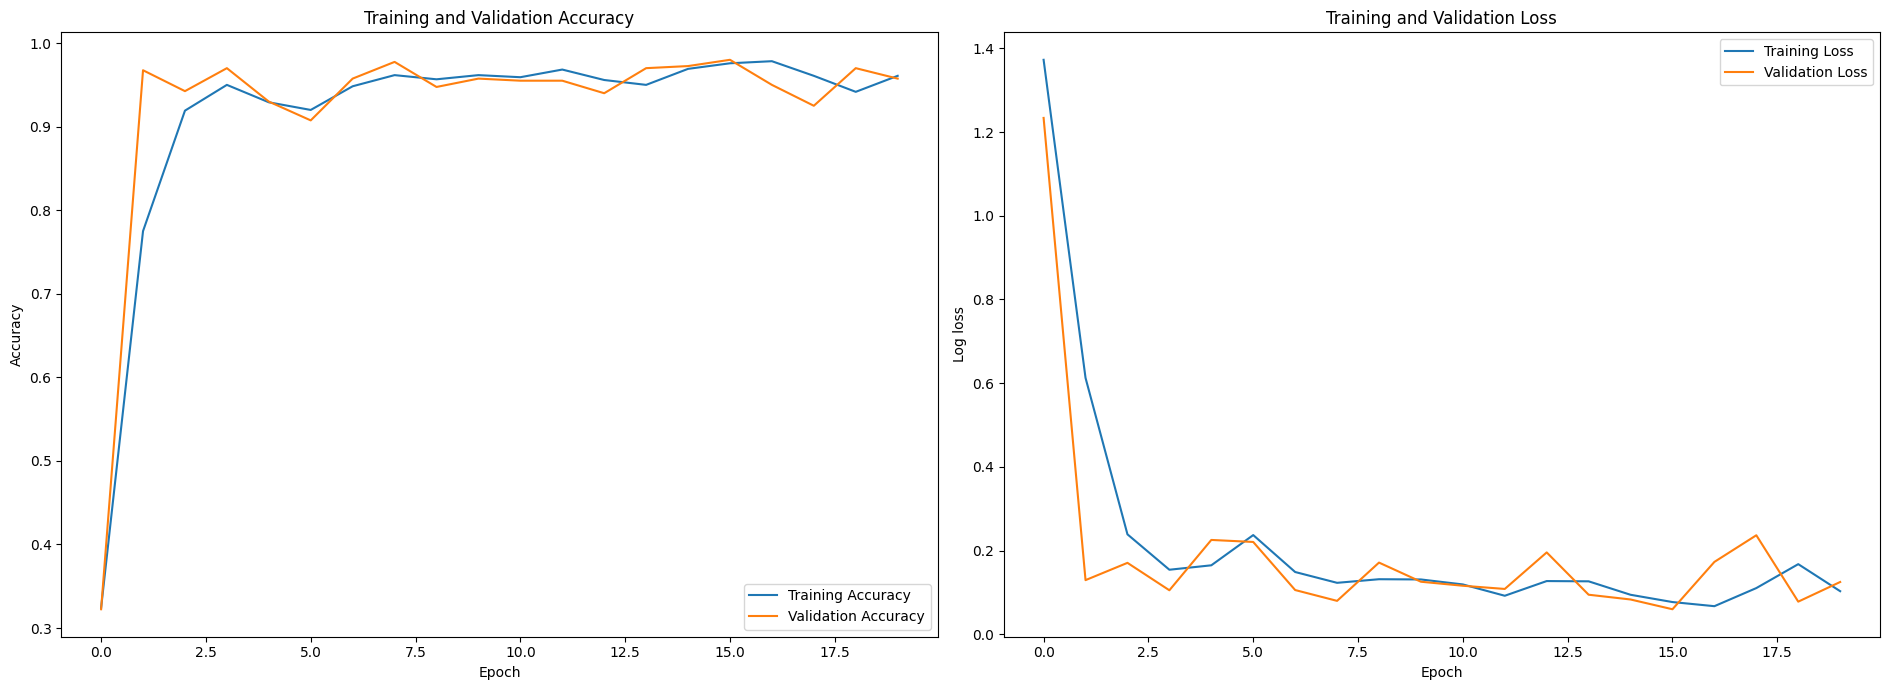

In [ ]:
plt.figure(figsize=(19,7))

plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Log loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

### Confusion Matrix

<ipython-input-30-b321575f33ce>:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred = model1.predict_generator(validation_generator)


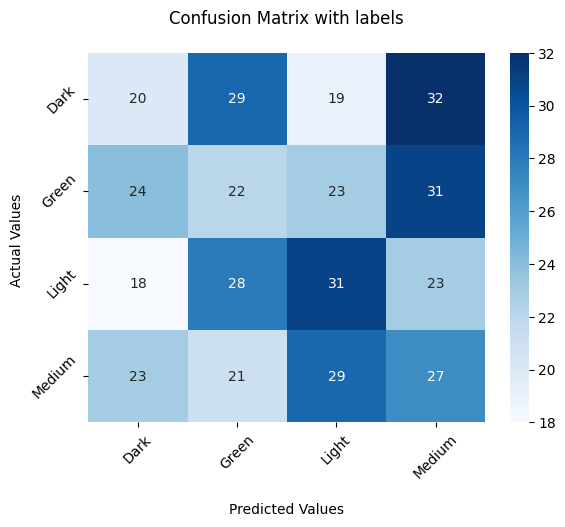

In [ ]:
y_test = validation_generator.classes
y_pred = model1.predict_generator(validation_generator)
y_pred = tf.argmax(y_pred, axis=1)

conf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')

ax.set_title('Confusion Matrix with labels\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(labels, rotation=45)
ax.yaxis.set_ticklabels(labels, rotation=45)

plt.show(block = None)

### Classification Report

In [ ]:
print(classification_report(y_test, y_pred))
print("Labels: ",train_generator.class_indices)
print()

              precision    recall  f1-score   support

           0       0.24      0.20      0.22       100
           1       0.22      0.22      0.22       100
           2       0.30      0.31      0.31       100
           3       0.24      0.27      0.25       100

    accuracy                           0.25       400
   macro avg       0.25      0.25      0.25       400
weighted avg       0.25      0.25      0.25       400

Labels:  {'Dark': 0, 'Green': 1, 'Light': 2, 'Medium': 3}



## MODEL 2 : Mobilenetv2



In [ ]:
from tensorflow.keras import Model
from tensorflow.keras.applications import MobileNetV2
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, Activation, Flatten, MaxPool2D, GlobalAveragePooling2D

In [ ]:
# Model Functional API
pre_trained_model = MobileNetV2(input_shape = (224, 224, 3), 
                                include_top = False, 
                                weights = 'imagenet')

# Freeze the weights of the layers.
for layer in pre_trained_model.layers:
  layer.trainable = False

def create_model():
  base_model = pre_trained_model.output
  # pooling = layers.GlobalAveragePooling2D()(base_model)
  flatten = layers.Flatten()(base_model)
  dense = layers.Dense(512, activation='relu')(flatten)
  dropout = layers.Dropout(0.2)(dense)
  outputs = Dense(4, activation='softmax')(dropout)

  model2 = Model(pre_trained_model.input, outputs)

# Compile  
  model2.compile(
    loss='categorical_crossentropy',
    optimizer= tf.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)
  return model2

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
model2 = create_model()
# displays the name of the model, the model type, and the model formula
model2.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [ ]:
# train model
history2 = model2.fit(train_generator,
                    epochs = 20,
                    validation_data = validation_generator,
                    verbose = 1,
                    )

Epoch 1/20
38/38 [==============================] - 109s 3s/step - loss: 14.3084 - accuracy: 0.6500 - val_loss: 0.7410 - val_accuracy: 0.9200
Epoch 2/20
38/38 [==============================] - 107s 3s/step - loss: 0.7854 - accuracy: 0.9133 - val_loss: 0.1810 - val_accuracy: 0.9575
Epoch 3/20
38/38 [==============================] - 105s 3s/step - loss: 0.3316 - accuracy: 0.9408 - val_loss: 0.2136 - val_accuracy: 0.9500
Epoch 4/20
38/38 [==============================] - 120s 3s/step - loss: 0.2198 - accuracy: 0.9500 - val_loss: 0.1224 - val_accuracy: 0.9675
Epoch 5/20
38/38 [==============================] - 119s 3s/step - loss: 0.1637 - accuracy: 0.9592 - val_loss: 0.0924 - val_accuracy: 0.9575
Epoch 6/20
38/38 [==============================] - 105s 3s/step - loss: 0.1487 - accuracy: 0.9458 - val_loss: 0.0513 - val_accuracy: 0.9800
Epoch 7/20
38/38 [==============================] - 104s 3s/step - loss: 0.1925 - accuracy: 0.9467 - val_loss: 0.0498 - val_accuracy: 0.9850
Epoch 8/20
3

### Model Evaluate

In [ ]:
score = model2.evaluate(train_generator)

print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

38/38 [==============================] - 69s 2s/step - loss: 0.0736 - accuracy: 0.9750
Loss: 0.0736
Accuracy: 0.9750


In [ ]:
score = model2.evaluate(validation_generator)

print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

13/13 [==============================] - 27s 2s/step - loss: 0.0328 - accuracy: 0.9825
Loss: 0.0328
Accuracy: 0.9825


### Plot The Training & Validation Accuracies for Each Epochs (MODEL 2)

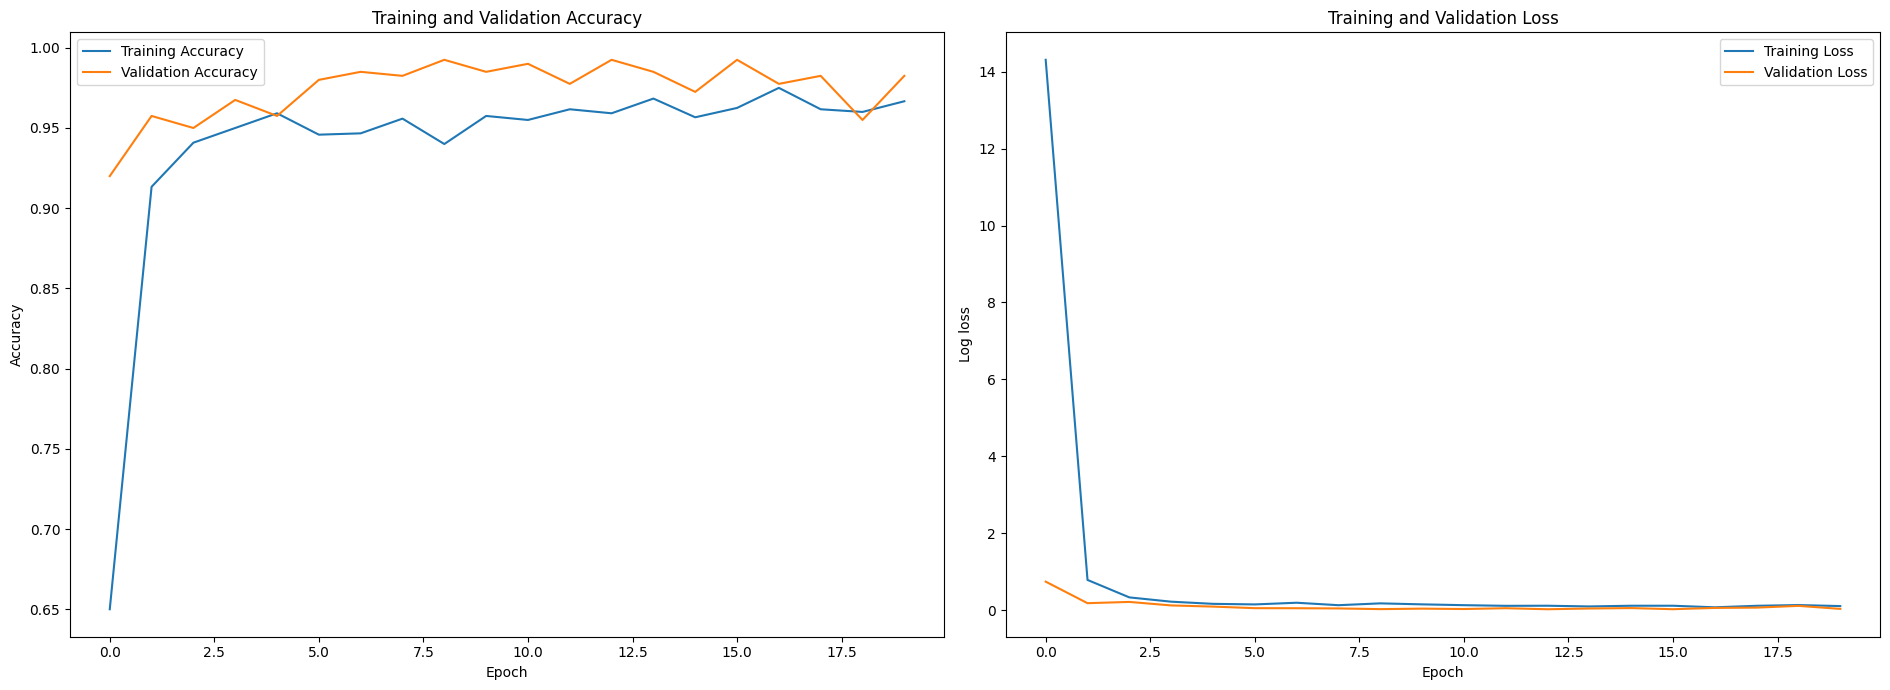

In [ ]:
plt.figure(figsize=(19,7))

plt.subplot(1, 2, 1)
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Log loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

### Confussion Matrix

<ipython-input-39-f803e8e5f939>:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred = model2.predict_generator(validation_generator)


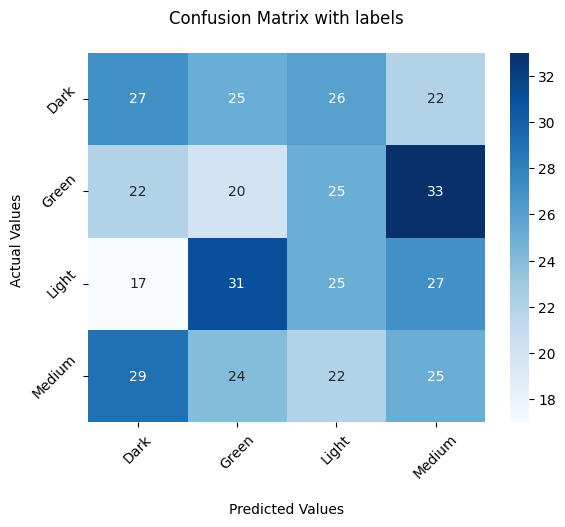

In [ ]:
y_test = validation_generator.classes
y_pred = model2.predict_generator(validation_generator)
y_pred = tf.argmax(y_pred, axis=1)

conf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')

ax.set_title('Confusion Matrix with labels\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(labels, rotation=45)
ax.yaxis.set_ticklabels(labels, rotation=45)

plt.show(block = None)

### Classification Report

In [ ]:
print(classification_report(y_test, y_pred))
print("Labels: ",train_generator.class_indices)
print()

              precision    recall  f1-score   support

           0       0.28      0.27      0.28       100
           1       0.20      0.20      0.20       100
           2       0.26      0.25      0.25       100
           3       0.23      0.25      0.24       100

    accuracy                           0.24       400
   macro avg       0.24      0.24      0.24       400
weighted avg       0.24      0.24      0.24       400

Labels:  {'Dark': 0, 'Green': 1, 'Light': 2, 'Medium': 3}



## Conclusion

In [ ]:
cnn_score_train = model1.evaluate(train_generator)
cnn_score_validation = model1.evaluate(validation_generator)

print("\nCNN Model")
print('Loss \t\t: {:.4f}'.format(cnn_score_train[0]))
print('Accuracy \t: {:.4f}'.format(cnn_score_train[1]))
print('Loss \t\t: {:.4f}'.format(cnn_score_validation[0]))
print('Accuracy \t: {:.4f}'.format(cnn_score_validation[1]))
print("\n")

mobilenetv2_score_train = model2.evaluate(train_generator)
mobilenetv2_score_validation = model2.evaluate(validation_generator)

print("\nMobileNetV2")
print('Loss \t\t: {:.4f}'.format(mobilenetv2_score_train[0]))
print('Accuracy \t: {:.4f}'.format(mobilenetv2_score_train[1]))
print('Loss \t\t: {:.4f}'.format(mobilenetv2_score_validation[0]))
print('Accuracy \t: {:.4f}'.format(mobilenetv2_score_validation[1]))

13/13 [==============================] - 2s 179ms/step - loss: 0.1252 - accuracy: 0.9575

CNN Model
Loss 		: 0.0625
Accuracy 	: 0.9808
Loss 		: 0.1252
Accuracy 	: 0.9575


13/13 [==============================] - 18s 1s/step - loss: 0.0328 - accuracy: 0.9825

MobileNetV2
Loss 		: 0.0880
Accuracy 	: 0.9725
Loss 		: 0.0328
Accuracy 	: 0.9825


**MobileNetV2** has high accuracy and lower loss also the model is not too complex. This model will be used for Coffee Bean Roasted Classification.

## Prediction

Saving green bean.jpg to green bean.jpg
1/1 [==============================] - 0s 92ms/step

Predict:
Predict : Green

Probablity:
Dark : 0.00%
Green : 99.99%
Light : 0.01%
Medium : 0.00%


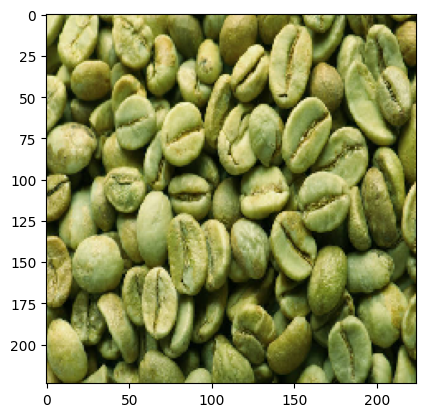

In [ ]:
from google.colab import files 
import keras.utils as image

uploaded = files.upload()
 
for path in uploaded.keys():
  img = image.load_img(path, target_size=(224,224))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  
  images = np.vstack([x])
  images /= 255
  classes = model2.predict(images, batch_size=32)
  predicted_class_indices=np.argmax(classes)


print("\nPredict:")
if predicted_class_indices == 0:
  print('Predict : Dark')
elif predicted_class_indices == 1:
  print('Predict : Green')
elif predicted_class_indices == 2:
  print('Predict : Light')
elif predicted_class_indices == 3:
  print('Predict : Medium')

print("\nProbablity:")
for idx, val in enumerate(labels):
  print("{} : {:.2f}%".format(val, classes[0][idx] * 100))

## SAVE MODEL

### Save Model to h.5

In [ ]:
from pathlib import Path

load_model_dir = "/content/drive/My Drive/coffee_bean_roasting_level/load_models/"

#python program to check if a path exists
#if it doesn’t exist we create one
import os
if not os.path.exists(load_model_dir):
   os.makedirs(load_model_dir)

In [ ]:
model2.save(os.path.join(load_model_dir, 'mobilenetv2.h5'))

In [ ]:
saved_model_path = os.path.join(load_model_dir, 'mobilenetv2.h5')
if os.path.exists(saved_model_path):
    print('Model berhasil disimpan di Google Drive.')
else:
    print('Model gagal disimpan di Google Drive.')

Model berhasil disimpan di Google Drive.


### Save Model to TFLite

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model2)
tflite_model = converter.convert()

tflite_model_file = '/content/drive/My Drive/coffee_bean_roasting_level/load_models/mobilenetv2.tflite'
with open(tflite_model_file, 'wb') as f:
    f.write(tflite_model)